<img src="../Data/images/ZumiHeader.png" width=700>

# Stop Sign Detection

<font size =3>In this lesson, you will learn what a Haar Cascade is, how they work, and why they are important for object detection. In particular, Zumi will be able to detect a stop sign!

You have no problem identifying the sign below as a stop sign, but how did you learn this? What difficulties will a computer have in trying to do the same task?</font>

## Identifying objects

<font size =3>You have no problem identifying the sign below as a stop sign, but how did you learn this? What difficulties will a computer have in trying to do the same task?</font>

<img src="../Data/images/stop_sign.png" width=200>

<font size =3>The easiest way to identify that this is a stop sign is by the big letters that read “STOP”. However, a computer would have to learn to read and understand English before detecting the stop sign. Instead, you teach the computer by inputting multiple pictures of stop signs, called positive images, as well as images that **do not** have stop signs, called negative images. This is similar to how humans learn. We are exposed to signs that are stop signs and exposed to signs that are not. Which sign is this?</font>

<img src="../Data/images/stop_sign_blank.png" width=200>

<font size =3>Easy, right? Even if we took away the word “STOP”, you would be able to pick out certain features that make it a stop sign: a red octagon. Computers are trained in a similar way to look for features.</font>

## Feature Selection

<font size =3>The Haar Cascade algorithm was developed based on a set of features called Haar-like features. Think back to the lesson on color classification. Remember that an image is a set of pixels and that each pixel in the color image is normally represented by a set of three numbers. Now imagine that we convert that photo to grayscale. 
</font>

<img src="../Data/images/bw_stop_sign.png" width=200>

<font size =3>How many numbers do you need to represent each pixel? In a grayscale image, you only need one number per pixel instead of three. The lowest value is 0 representing black and the highest value is 255 representing white. Any value in between is a shade of grey. If you zoom in close enough to the image, you will be able to see individual pixels. In the image below, you are looking at the top of the "S" in "STOP".</font>

<img src="../Data/images/stop_sign_zoomed.png">

<font size =3> Once the computer has seen positive and negative images, it can learn which images have stop signs and which do not. Even though the computer isn’t aware of what it’s looking at, it can see pixel value patterns in certain arrangements where pixels are lighter or darker. </font>

[ insert image here showing edge and line detections ]

## Haar Cascade File

<font size=3> When a model is trained, all of the features are saved in the Haar cascade file. These files are .XML (extensible markup language) that can be used by the computer to detect a stop sign. In them are thousands of lines of code that contains all of the information for classifying whatever it was trained to detect. There are .XML cascade files available online for detecting faces, cars, street signs, smiles, and more. <br>
    
Training a Haar Cascade is time-consuming. To make a decent classifier you would need thousands of positive and negative images and some computing power. To save you some time and effort, you will be using a pre-trained model. Don't worry, you still need to learn how to use the functions with Zumi! </font>

## Code

### Import libraries

<font size=3> The code that you will need for detecting stop signs will be in the vision library. You will also need the camera and zumi libraries!</font>


In [1]:
from zumi.zumi import Zumi
from zumi.util.screen import Screen
from zumi.util.vision import Vision 
from zumi.util.camera import Camera 
import time

zumi = Zumi()
camera = Camera()
screen = Screen()
vision = Vision()

Starting Zumi 
Pi Zero I2C is available
Verified Pi Zero is the same
Gyroscope previously calibrated
Zumi board detected
OLED Screen detected
Gyroscope & Accelerometer detected


### detect_stop_sign()
<font size=3> This function is part of the vision library and will return True if a stop sign is detected, and False if not detected. It takes in an image parameter, so you will need to take a picture and pass it into the function. The function turns your image into grayscale for you. Here's an example!

Starting PiCamera
True


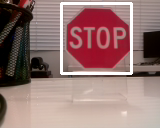

Closing PiCamera


In [2]:
camera.start_camera()  # Turn on the camera
img = camera.capture()  # Take and save an image
print(vision.detect_stop_sign(img))  #Print True or False
camera.show_image(img)  # Show the image in the console
camera.close()  # Don't forget to close the camera!

### Activity: Drive and Stop

<font size=3> Detecting stop signs and taking the right actions is extremely important for a self-driving car. In this activity, you will write a code so that Zumi drives forward until a stop sign is detected. What will the pseudocode look like?<br><br>
    
<font face="Courier">
take a picture <br>
check if a stop sign is detected<br>
if true, stop and break loop <br>
else, take a forward step<br>
repeat 100 times <br>  
</font>
    
We started the code for you below. Try it before you scroll down to see the solution!</font>

In [ ]:
camera.start_camera()
for i in range(100):
    
    # TODO: Take a picture
    # TODO Call detect_stop_sign
    # TODO If true, break the loop
    # TODO Else, call forward_step
    

zumi.stop()
camera.close()

### Solution: Drive and Stop
<font size=3> If you were having some trouble with the solution, take a look at two possible solutions below: </font>


In [ ]:
camera.start_camera()
for i in range(100):
    
    img = camera.capture()  # Take a picture
    stop_sign_detect = vision.detect_stop_sign(img)  # Call detect_stop_sign
    
    if stop_sign_detect:  # If true, break the loop
        break
    else:                 # Else, call forward_step
        zumi.forward_step(20,0)
    

zumi.stop()
camera.close()

In [ ]:
camera.start_camera()
stop_sign_detect = False # initialize the condition to be False

while not stop_sign_detect:
    
    img = camera.capture()  # Take a picture
    stop_sign_detect = vision.detect_stop_sign(img)  # Call detect_stop_sign
    zumi.forward_step(20,0)
    

zumi.stop()
camera.close()

### Example: Wait and Drive
<font size=3> In this example, Zumi will wait while a stop sign is detected, then drive forward once a stop sign is not detected. 

In [ ]:
camera.start_camera()
stop_sign_detect = True # initialize the condition to be False

while stop_sign_detect:
    img = camera.capture()  # Take a picture
    stop_sign_detect = vision.detect_stop_sign(img)  # Call detect_stop_sign
    
camera.close()
zumi.forward(duration=3)